#### 前面两个例子都是分类问题，其目标是预测输入数据点所对应的单一离散的标签。另一种 常见的机器学习问题是回归问题，它预测一个连续值而不是离散的标签

不要将回归问题与 logistic 回归算法混为一谈，logistic 回归不是回归算法， 而是分类算法

### 数据集

本节将要预测20 世纪70 年代中期波士顿郊区房屋价格的中位数，已知当时郊区的一些数 据点，比如犯罪率、当地房产税率等。本节用到的数据集与前面两个例子有一个有趣的区别。 它包含的数据点相对较少，只有506 个，分为404 个训练样本和102 个测试样本。输入数据的 每个特征（比如犯罪率）都有不同的取值范围。例如，有些特性是比例，取值范围为0~1；有 的取值范围为 1~12；还有的取值范围为 0~100

In [54]:
from keras.datasets import boston_housing

(train_data,train_targets),(test_data,test_targets) = boston_housing.load_data()

###### 有404 个训练样本和 102 个测试样本，每个样本都有13 个数值特征

In [55]:
print(train_data.shape,test_data.shape)

(404, 13) (102, 13)


The data comprises 13 features. The 13 features in the input data are as 
follow:

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

The targets are the median values of owner-occupied homes, in thousands of dollars:

In [56]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [57]:
print(train_data[0])
print(len(train_data))

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
404


### 准备数据
- 取值范围差异很大的数据输入到神经网络中，这是有问题的。网络可能会自动适应这种 取值范围不同的数据，但学习肯定变得更加困难
- 对于这种数据，普遍采用的最佳实践是对每 个特征做标准化，即对于输入数据的每个特征（输入数据矩阵中的列），减去特征平均值，再除 以标准差，这样得到的特征平均值为 0，标准差为 1。

In [58]:
import numpy as np

mean = train_data.mean(axis=0)
print(train_data.shape)
print(mean.shape)

train_data -= mean
std = train_data.std(axis=0)
train_data/=std

test_data -= mean
test_data /= std

(404, 13)
(13,)


### 构建网络

由于样本数量很少，我们将使用一个非常小的网络，其中包含两个隐藏层，每层有64 个单 元。一般来说，训练数据越少，过拟合会越严重，而较小的网络可以降低过拟合。 

In [59]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    # metrics: 在训练和测试期间的模型评估标准
    # mae:mean absolute error 差值绝对值求和平均
    # mse:mean square erros 差值平方求和平均
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

网络的最后一层只有一个单元，没有激活，是一个线性层。这是标量回归（标量回归是预 测单一连续值的回归）的典型设置。添加激活函数将会限制输出范围。例如，如果向最后一层 添加 sigmoid 激活函数，网络只能学会预测0~1 范围内的值。这里最后一层是纯线性的，所以 网络可以学会预测任意范围内的值

编译网络用的是 mse 损失函数，即均方误差（MSE，mean squared error），预测值与 目标值之差的平方。这是回归问题常用的损失函数

在训练过程中还监控一个新指标：平均绝对误差（MAE，mean absolute error）。它是预测值 与目标值之差的绝对值。比如，如果这个问题的MAE 等于0.5，就表示你预测的房价与实际价 格平均相差 500 美元

In [60]:
# k折验证
import numpy as np

# 组数
k = 4
# 求出每组的个数
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #',i)
    # 第k个分区的数据
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    # 利用concatenate合并两个分开的数组，作为训练数据
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0) 

    model = build_model()
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=1,
              # 0, 1 或 2。日志显示模式。 0 = 安静模式, 1 = 进度条, 2 = 每轮一行
              verbose=0)

    # evaluate:在测试模式下返回模型的误差值和评估标准值
    val_mse,val_mae = model.evaluate(val_data,val_targets,verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [65]:
all_scores

[2.1125421252581154,
 2.1596861570188315,
 2.9189141540244075,
 2.3791641014637332]

In [62]:
np.mean(all_scores)

2.392576634441272

每次运行模型得到的验证分数有很大差异，从2.6 到 3.2 不等。平均分数（3.0）是比单一 分数更可靠的指标——这就是K 折交叉验证的关键

让训练时间更长一点，达到500 个轮次。为了记录模型在每轮的表现，我们需要修改 训练循环，以保存每轮的验证分数记录

### 保存每折的验证结果

In [64]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

num_epochs = 500
k = 4
num_val_samples = len(train_data)//k
all_mae_histories = []

for i in range(k):
    print('processing fold # ',i)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
        (train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]),
        axis=0)
    partial_train_targets = np.concatenate(
        (train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]),
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data,
                        partial_train_targets,
                        validation_data=(val_data,val_targets),
                        batch_size=1,
                        epochs=num_epochs,
                        verbose=0)
    mae_history = history.history['mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold #  0
processing fold #  1
processing fold #  2
processing fold #  3


In [28]:
np.array(all_mae_histories).shape

(4, 500)

In [67]:
# 　计算所有轮次中的 K 折验证分数平均值 
average_mae_history =[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
len(average_mae_history)

500

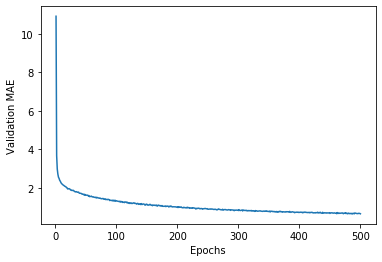

In [69]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [70]:
# 因为纵轴的范围较大，且数据方差相对较大，所以难以看清这张图的规律。我们来重新绘 制一张图
# - 删除前 10 个数据点，因为它们的取值范围与曲线上的其他点不同
# - 将每个数据点替换为前面数据点的指数移动平均值，以得到光滑的曲线

def smooth_curve(points,factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history  = smooth_curve(average_mae_history[10:])
len(smooth_mae_history)

490

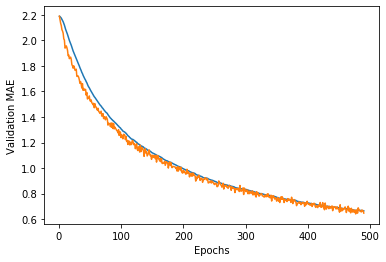

In [71]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.plot(range(1,len(average_mae_history)-9),average_mae_history[10:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

完成模型调参之后（除了轮数，还可以调节隐藏层大小），你可以使用最佳参数在所有训练 数据上训练最终的生产模型，然后观察模型在测试集上的性能。 

In [72]:
# 一个全新的模型
model = build_model()
model.fit(train_data,train_targets,epochs=80,batch_size=16,verbose=0)
test_mse_score,test_mae_score = model.evaluate(test_data,test_targets)

102/102 [==============================] - 0s 538us/step


In [73]:
test_mae_score

2.6769152903089335

要点:
- 回归问题使用的损失函数与分类问题不同。回归常用的损失函数是均方误差（MSE）
- 回归问题使用的评估指标也与分类问题不同。显而易见，精度的概念不适用于回 归问题。常见的回归指标是平均绝对误差（MAE）
- 如果输入数据的特征具有不同的取值范围，应该先进行预处理，对每个特征单独进行 缩放。
- 如果可用的数据很少，使用 K 折验证可以可靠地评估模型。 
- 如果可用的训练数据很少，最好使用隐藏层较少（通常只有一到两个）的小型网络，以 避免严重的过拟合。

章节总结：
- 现在你可以处理关于向量数据最常见的机器学习任务了：二分类问题、多分类问题和标 量回归问题。前面三节的“小结”总结了你从这些任务中学到的要点
- 在将原始数据输入神经网络之前，通常需要对其进行预处理。 
- 如果数据特征具有不同的取值范围，那么需要进行预处理，将每个特征单独缩放
- 随着训练的进行，神经网络最终会过拟合，并在前所未见的数据上得到更差的结果
- 如果训练数据不是很多，应该使用只有一两个隐藏层的小型网络，以避免严重的过拟合
- 如果数据被分为多个类别，那么中间层过小可能会导致信息瓶颈
- 如果要处理的数据很少，K 折验证有助于可靠地评估模型。